In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import datetime as dt

In [4]:
df = pd.read_csv('HRDataset.csv')

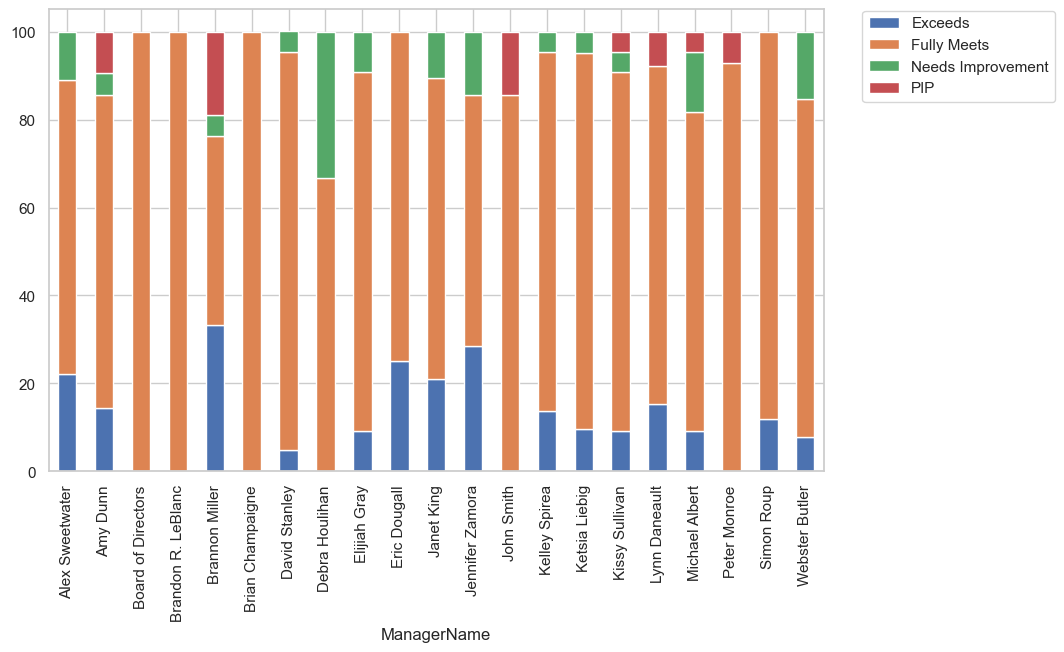

Porównując dane zawarte w wykresie, można zauważyć zależność pomiędzy oceną wydajności pracy (PerformanceScore) pracowników a tym, kto jest ich bezpośrednim przełożonym (ManagerName). 
Wszyscy pracownicy podlegający menadżerom Board of Directors, Brandon R. LeBlanc i Brian Champaigne otrzymują ocenę 'Fully Meets', co może oznaczać, że ci menadżerowie są mniej skłonni do nadawania innych ocen. 
W przypadku pozostałych menadżerów występuje większa różnorodność ocen, co sugeruje, że bardziej zwracają uwagę na różnice w wydajności między pracownikami.


In [58]:
#1
new_df = df.pivot_table(index=['ManagerName', 'ManagerID'], columns='PerformanceScore', values='EmpID', aggfunc='count').fillna(0)

brandon_sum = new_df.loc['Brandon R. LeBlanc'].sum()
new_df.loc['Brandon R. LeBlanc'].iloc[0] = brandon_sum
michael_sum = new_df.loc['Michael Albert'].sum()
new_df.loc['Michael Albert'].iloc[0] = michael_sum
new_df.reset_index(level=1, inplace=True)
new_df = new_df[~new_df.index.duplicated(keep="first")]
new_df.drop('ManagerID', axis=1, inplace=True)

percent_columns = ['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP']
new_df[percent_columns] = new_df[percent_columns].apply(lambda x: x / x.sum() * 100, axis=1).round(1)

sns.set(style="whitegrid")
new_df.plot(kind='bar', stacked=True, figsize = (10,6))
plt.legend(loc=(1.05,0.80))
plt.show()
print(f"Porównując dane zawarte w wykresie, można zauważyć zależność pomiędzy oceną wydajności pracy (PerformanceScore) pracowników a tym, kto jest ich bezpośrednim przełożonym (ManagerName). \nWszyscy pracownicy podlegający menadżerom Board of Directors, Brandon R. LeBlanc i Brian Champaigne otrzymują ocenę 'Fully Meets', co może oznaczać, że ci menadżerowie są mniej skłonni do nadawania innych ocen. \nW przypadku pozostałych menadżerów występuje większa różnorodność ocen, co sugeruje, że bardziej zwracają uwagę na różnice w wydajności między pracownikami.")

In [6]:
#2
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')


def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2023,10,15)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire']) / np.timedelta64(365, 'D')


df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

C:\Users\sabin\AppData\Local\Temp\ipykernel_2492\974831444.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


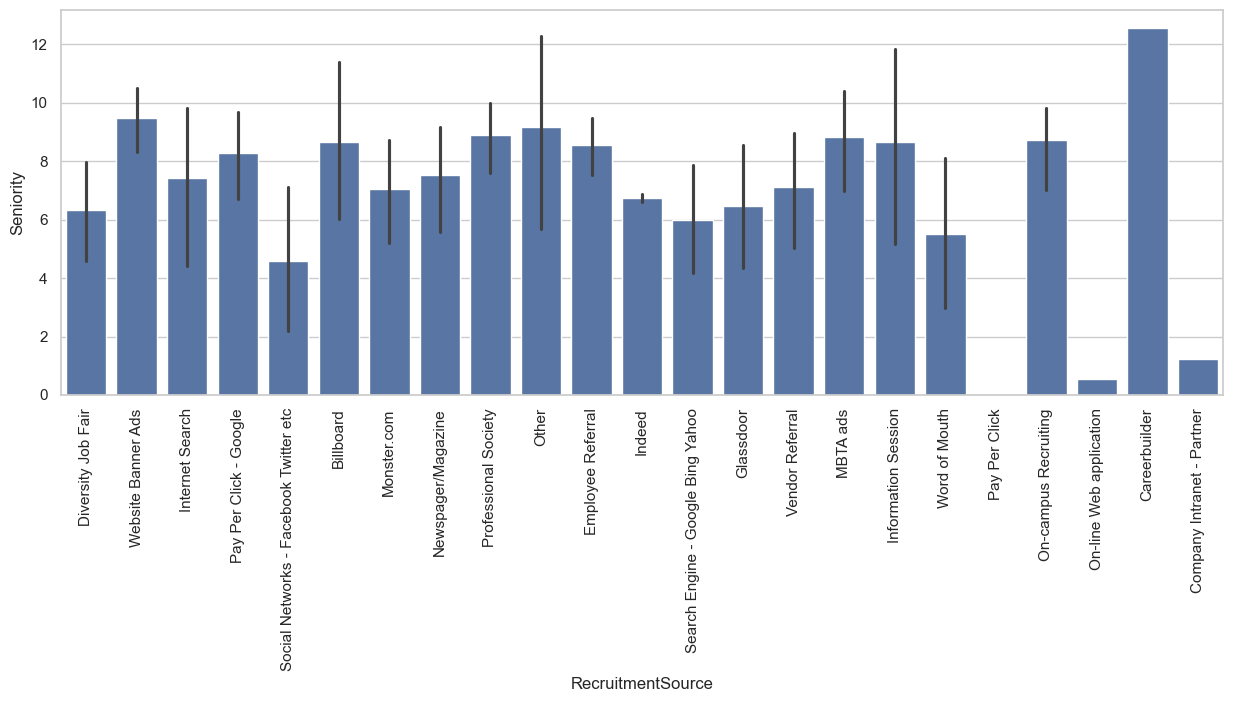

Jeśli zależy nam na jak najdłuższym stażu pracowników najlepszymi źródłami do rekrutacji są Careerbuilder, Webside Banner Ads i Other.


In [65]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='RecruitmentSource', y='Seniority', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print(f"Jeśli zależy nam na jak najdłuższym stażu pracowników najlepszymi źródłami do rekrutacji są Careerbuilder, Webside Banner Ads i Other.")

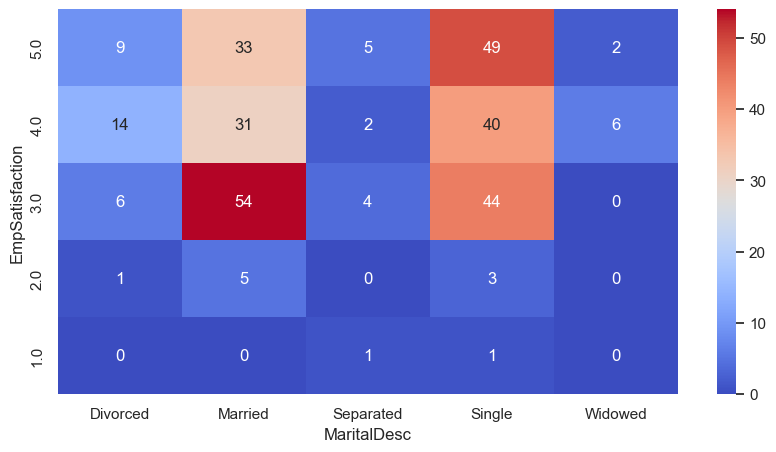

Na podstawie danych powyższej heatmapy można stwierdzić, że istnieje zależność między stanem cywilnym pracowników a poziomem zadowolenia z pracy. 
Najwyższy poziom zadowolenia z pracy występuje wśród pracowników stanu cywilnego 'Single', gdzie odnotowano największą ilość ocen na poziomie 5. 
W grupie 'Married' poziom zadowolenia jest niższy, z przewagą ocen na poziomie 3. 
W przypadku pozostałych grup stanu cywilnego, takich jak 'Divorced', 'Separated' i 'Widowed', poziomy zadowolenia również są niższe niż w przypadku stanu 'Single'.


In [62]:
#3
df2 = pd.crosstab(df['EmpSatisfaction'],df['MaritalDesc'])

plt.figure(figsize=(10, 5))
sns.heatmap(df2.iloc[::-1], annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.show()

print(f"Na podstawie danych powyższej heatmapy można stwierdzić, że istnieje zależność między stanem cywilnym pracowników a poziomem zadowolenia z pracy. \nNajwyższy poziom zadowolenia z pracy występuje wśród pracowników stanu cywilnego 'Single', gdzie odnotowano największą ilość ocen na poziomie 5. \nW grupie 'Married' poziom zadowolenia jest niższy, z przewagą ocen na poziomie 3. \nW przypadku pozostałych grup stanu cywilnego, takich jak 'Divorced', 'Separated' i 'Widowed', poziomy zadowolenia również są niższe niż w przypadku stanu 'Single'.")

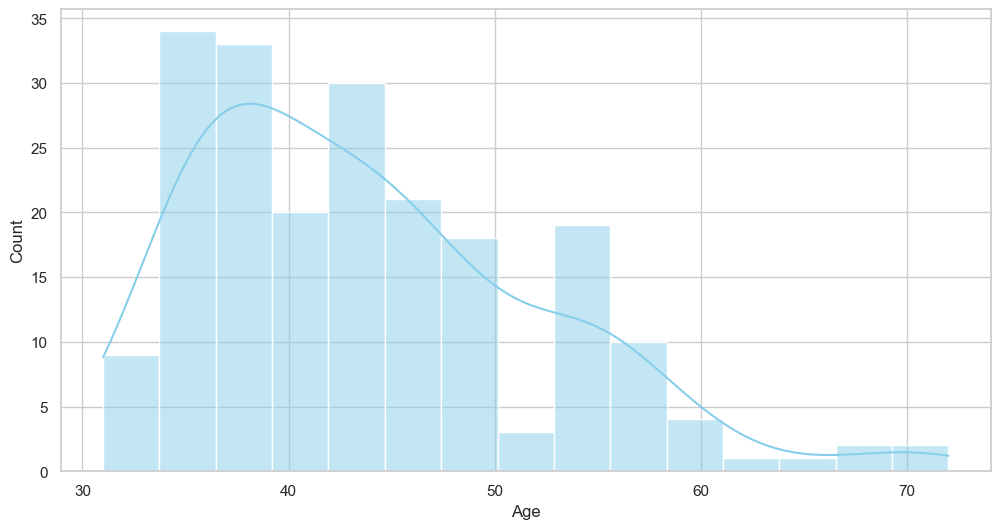

W strukturze wieku obecnych pracowników możemy dostrzec wyraźny wzrost liczby pracowników w wieku powyżej 30 lat, osiągając szczyt w okolicach 40 roku życia. Następnie liczba pracowników zaczyna stopniowo maleć, a najstarsi z nich mają około 70 lat.


In [63]:
#4
df['DOB'] = df['DOB'].apply(lambda date: date.replace(year=date.year - 100) if date.year > 2005 else date)

df['Age'] = dt.datetime.now().year - hire_df['DOB'].dt.year

hire_df = df[df['DateofTermination'].isna()]

plt.figure(figsize=(12, 6))
sns.histplot(data=hire_df, x='Age', kde=True, bins=15, color='skyblue')
plt.show()

print(f"W strukturze wieku obecnych pracowników możemy dostrzec wyraźny wzrost liczby pracowników w wieku powyżej 30 lat, osiągając szczyt w okolicach 40 roku życia. Następnie liczba pracowników zaczyna stopniowo maleć, a najstarsi z nich mają około 70 lat.")

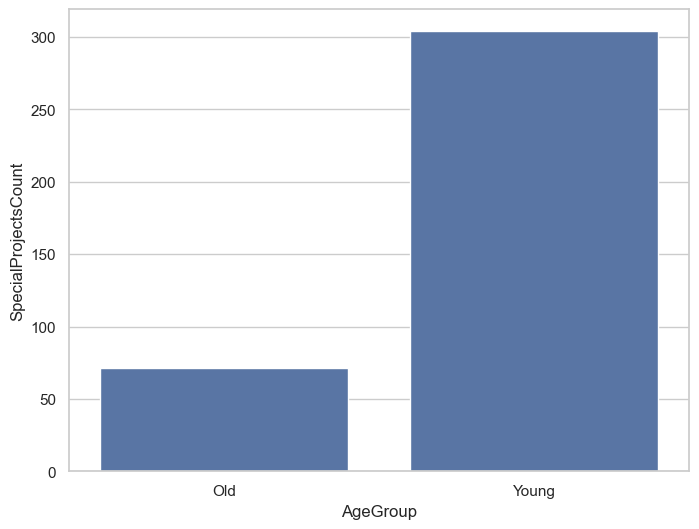

 Starsi pracownicy pracują nad znacznie mniejszą liczbą specjalnych projektów niż młodsi.


In [64]:
#5
threshold_age = 50
df['AgeGroup'] = df['Age'].apply(lambda age: 'Old' if age >= threshold_age else 'Young')

sp_df = df.groupby('AgeGroup')['SpecialProjectsCount'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='SpecialProjectsCount', data=sp_df)
plt.show()

print(f" Starsi pracownicy pracują nad znacznie mniejszą liczbą specjalnych projektów niż młodsi.")